Proportion of CIs covering Pop mean 0.93


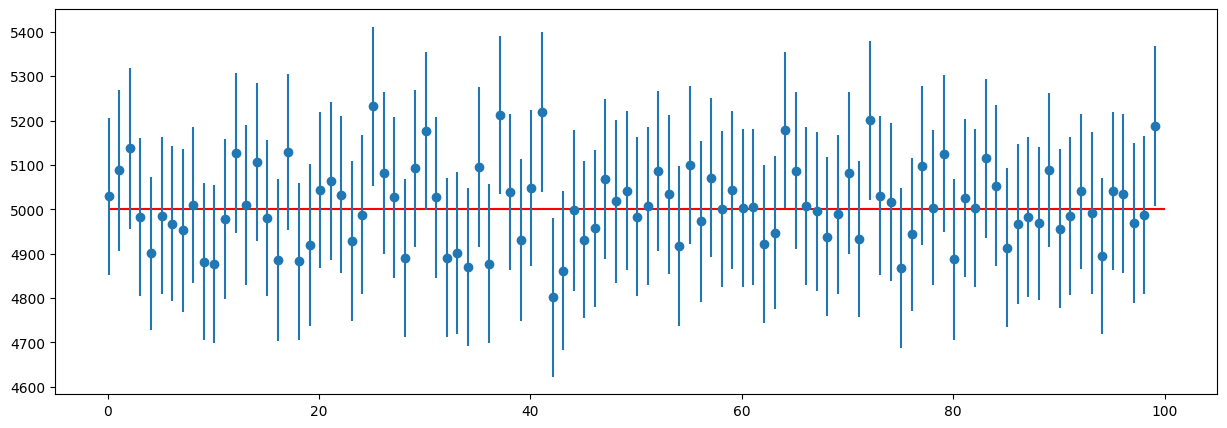

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random

population = np.arange(1, 10**4) #random population
pop_mean = np.mean(population)

def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        #a sample of size sample_size will be taken
        sample = random.sample(list(population), sample_size)
        #mean of the samples appended to sample_means
        sample_means.append(np.mean(sample))
        #ci contains lower and upper bound of interval with 0.95 confidence
        ci = norm.interval(0.95, np.mean(sample), 
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)
        #upcount only if pop_mean lies in confidence interval
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
            
    print('Proportion of CIs covering Pop mean', count/no_of_samples)
    plt.figure(figsize=(15,5))
    #print the horizontal line which is pop_mean
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    #print the sample lines with their means indicated as 'o'
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()
    
#pass sample_size, no_of_samples
sampling(1000, 100)

In [3]:
#CI for population where 85% of the people say YES to a certain question
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

#parameters....population, required_CI, sample_size, no_of_samples
def CI(pop, ci, samp_size, no_of_samples):
    print("\nfor ci of", ci, "sample_size", samp_size)
    pop_mean = np.mean(pop)
    print('actual mean :',pop_mean)
    
    #calculation of same using CI
    samp_means = []      #mean of all the samples 
    for i in range(no_of_samples):
        samp_means.append(np.mean(sample(pop, samp_size)))
    
    #calculation of interval
    print('mean of samples :', np.mean(samp_means))
    pop_stdev = np.std(samp_means) / math.sqrt(samp_size)
    z = st.norm.ppf(ci)
    print("confidence interval :", pop_mean, "+-", z*pop_stdev)
    plt.hist(samp_means)
    plt.show()
    
pop = sample(range(1, 2*10**5), 10**4)  #random population generation



for ci of 0.85 sample_size 1000
actual mean : 100086.7646
mean of samples : 100198.62897500001
confidence interval : 100086.7646 +- 58.340833701766975


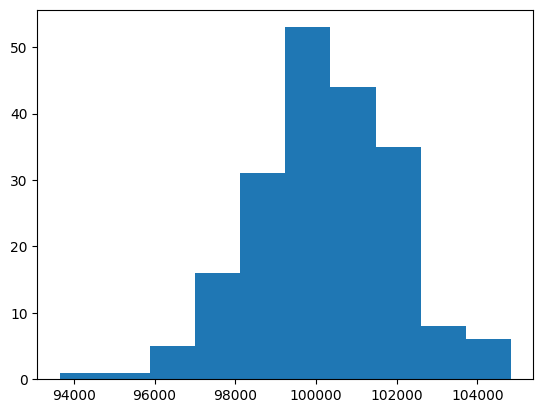


for ci of 0.85 sample_size 1000
actual mean : 100086.7646
mean of samples : 100089.081846
confidence interval : 100086.7646 +- 54.26313169132391


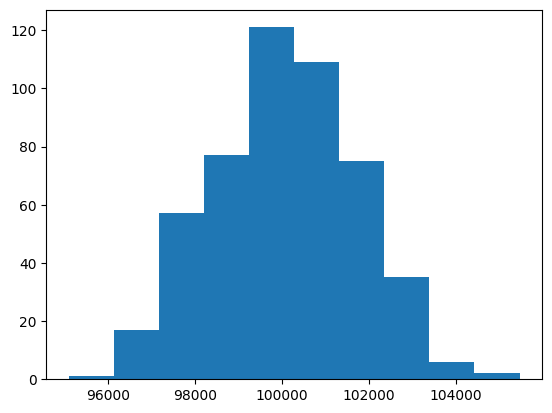


for ci of 0.85 sample_size 1000
actual mean : 100086.7646
mean of samples : 100140.380726
confidence interval : 100086.7646 +- 57.08417155868274


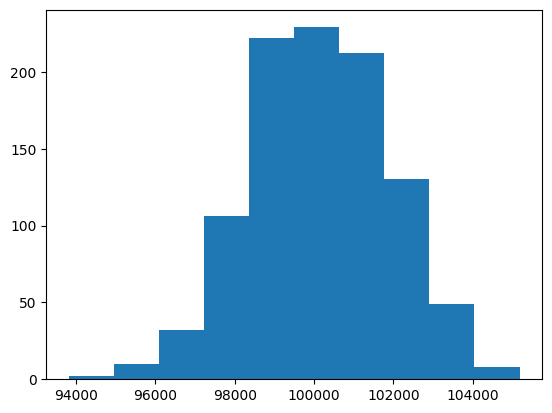

In [4]:
#varying no_of_samples
CI(pop, 0.85, 1000, 200)
CI(pop, 0.85, 1000, 500)
CI(pop, 0.85, 1000, 1000)
#shape of the curve becomes normal as the no of samples increases(samp_mean better approx of actual mean)


for ci of 0.85 sample_size 100
actual mean : 100086.7646
mean of samples : 99745.10796000001
confidence interval : 100086.7646 +- 604.1682474005653


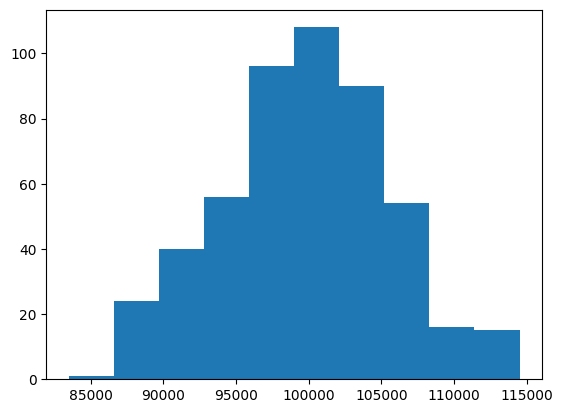


for ci of 0.85 sample_size 500
actual mean : 100086.7646
mean of samples : 100001.622948
confidence interval : 100086.7646 +- 113.51762131217545


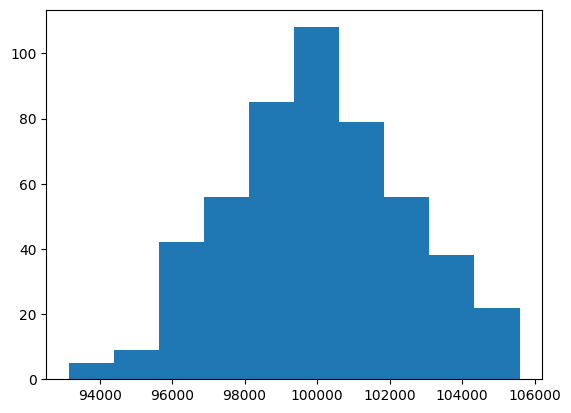


for ci of 0.85 sample_size 1000
actual mean : 100086.7646
mean of samples : 100021.621678
confidence interval : 100086.7646 +- 55.25179384960677


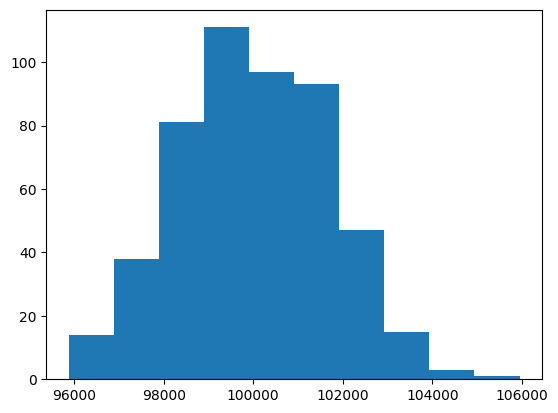

In [5]:
#varying sample size
CI(pop, 0.85, 100, 500)
CI(pop, 0.85, 500, 500)
CI(pop, 0.85, 1000, 500)
#reduction in the size of interval as sample_size increases(better approx of population)